## Imports

In [1]:
def addCodeDirToPath(codeDirSnippet):
    # This snippet will make sure code directory is in Python search path.  It drills up from 
    # the current working directory until the first directory in codeDirSnippet is found.  It
    # then builds a new full path that points to codeDirSnippet and appends it to Python's path.
    # It is designed such that it only runs once by only running if 'haveAddedCodeDirToPath' is
    # defined.
    global haveAddedCodeDirToPath
    try: #This is a run-once hack.  
        haveAddedCodeDirToPath
    except NameError:
        haveAddedCodeDirToPath = 'yes'
        codeDirSnippetList = codeDirSnippet.split(os.path.sep)
        codeDirList = list(filter(lambda x: x!='', codeDirSnippetList))
        targetDir = codeDirList[0]
        startPath = os.path.abspath(os.path.curdir)
        while True:
            (path, lastDir) = os.path.split(startPath)
            if lastDir != targetDir:
                startPath = path
            else:
                break
        codePath = os.path.join(path, *codeDirList)
        print('added:', codePath)
        sys.path.append(codePath)

In [2]:
import sys, os
codePath = os.path.join('code','MachLearnInvDesign','MachLearnInvDesign')
addCodeDirToPath(codePath)

added: C:\Users\brian\Desktop\CIS519_FinProj\cis519proj\code\MachLearnInvDesign\MachLearnInvDesign


In [3]:
from importlib import reload
import traceback

# Demo

In [4]:
import EMSim_Helmholtz
reload(EMSim_Helmholtz);

In [5]:
def BuildSim(zoom):
    z = zoom #zoom
    WL0 = 12*z #WL0 Must be divisble by 12
    domSizeX, domSizeY = 5, 5 # in wavelengths.  Must be integer.
    sim = EMSim_Helmholtz.EMSim(xyShape=(domSizeX*WL0, domSizeY*WL0), 
                                WL0=WL0, epsStart=1+0.j, epsEnd=2-0.j, 
                varBox=((WL0//2, domSizeX*WL0 - WL0//2),(2*WL0, 3*WL0)))
    margin = sim.WL0
    sim.setGoalPoint(xy=(5*WL0//2,5*WL0 - WL0//6), val=10+0j)
    xRange = range(margin, 5*WL0 - margin)
    yRange = range(margin, (margin + WL0//6))
    for x in xRange:
        for y in yRange:
            sim.setPointSource(xy=(x, y), val=1+0j)
    return sim

### At zoom=1

In [6]:
sim1=BuildSim(1)

In [7]:
sim1.visualizeMaterial();

In [8]:
sim1.visualizeSources();

In [9]:
sim1.visualizeGoal();

In [10]:
sim1.buildEquations()
sim1.solve()

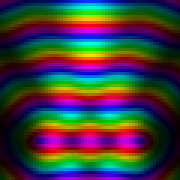

In [11]:
sim1.visualizeFields()

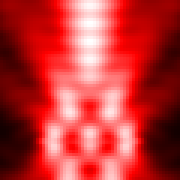

In [12]:
sim1.visualizeFieldsMag()

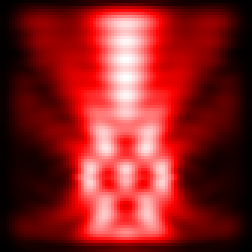

In [13]:
sim1.visualizeFieldsMagWithAbsorber()

In [14]:
sim1.getScore()

114.60943626849765

## At zoom=2

In [15]:
sim2=BuildSim(2)

In [16]:
sim2.visualizeMaterial();

In [17]:
sim2.visualizeSources();

In [18]:
sim2.visualizeGoal();

In [19]:
sim2.buildEquations()
sim2.solve()

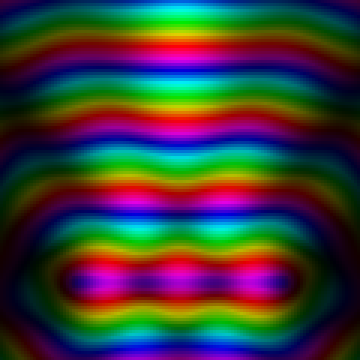

In [20]:
sim2.visualizeFields()

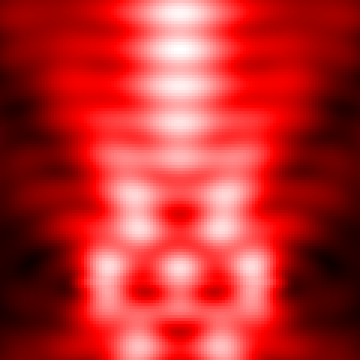

In [21]:
sim2.visualizeFieldsMag()

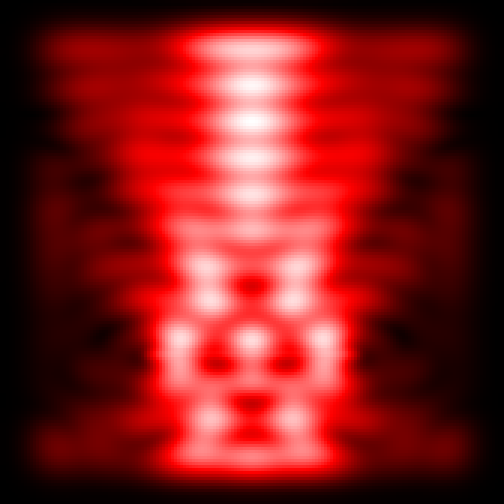

In [22]:
sim2.visualizeFieldsMagWithAbsorber()

In [23]:
sim2.getScore()

115.22437954210845

### At zoom=3

In [24]:
sim3=BuildSim(3)

In [25]:
sim3.visualizeMaterial();

In [26]:
sim3.visualizeSources();

In [27]:
sim3.visualizeGoal();

In [28]:
sim3.buildEquations()
sim3.solve()

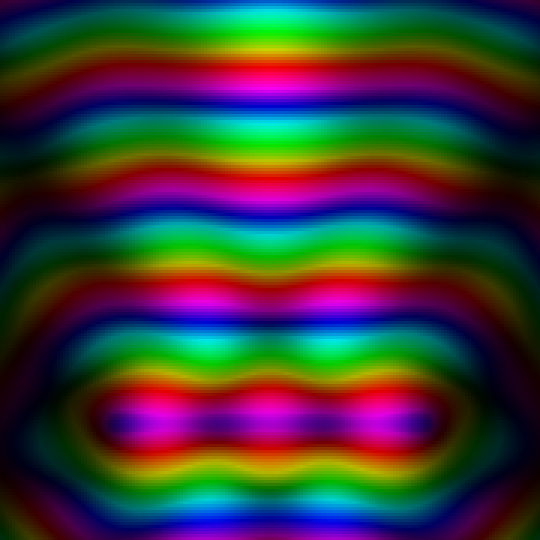

In [29]:
sim3.visualizeFields()

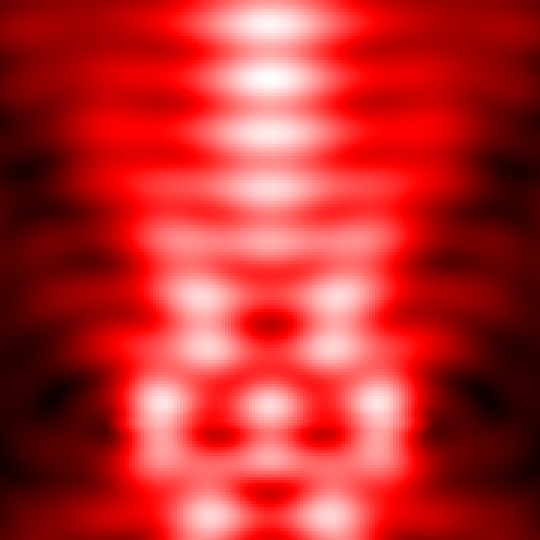

In [30]:
sim3.visualizeFieldsMag()

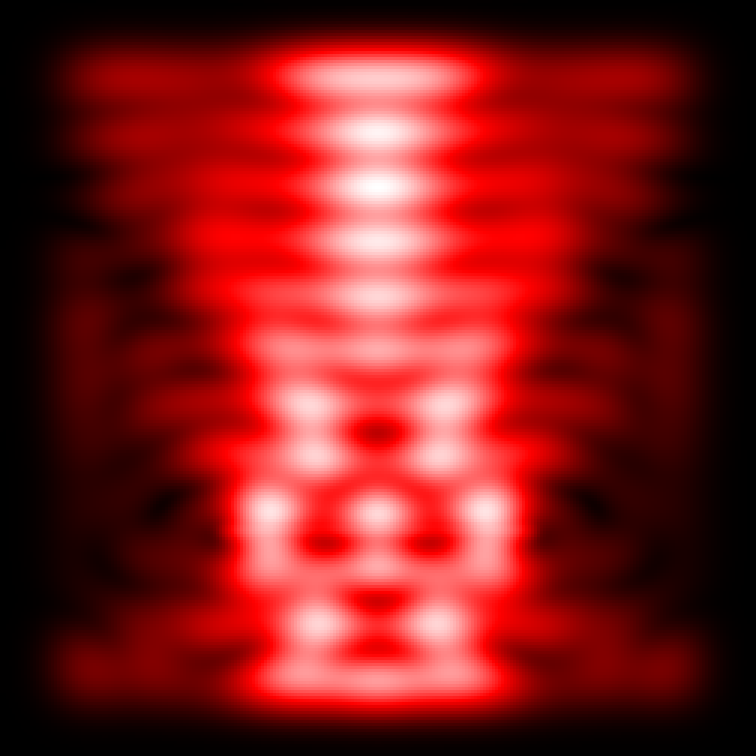

In [31]:
sim3.visualizeFieldsMagWithAbsorber()

In [32]:
sim3.getScore()

114.04652002443976